# Lab 3  Normal Distribution

##### Astik Sonawane 211090073

In [30]:
import pandas as pd 
import matplotlib
import numpy as np

###### 1.what is the expected daily rate of return of this stock
###### 2.which stock have higher risk and volatility and daily return and concernt
###### 3.which stock has higher probability of daily return 2% or more
###### 4.which stock has high end pribability of making a loss of 2% or more

In [31]:
beml_df = pd.read_csv(r"C:\Users\HOME\Desktop\DSA\Lab3\BEML.csv")
glaxo_df = pd.read_csv(r"C:\Users\HOME\Desktop\DSA\Lab3\GLAXO.csv")

#df.head()
glaxo_df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1734,2016-12-26,2703.00,2740.00,2677.00,2715.0,2723.50,3953.0,107.15
1735,2016-12-27,2722.95,2725.00,2683.00,2692.0,2701.75,10600.0,286.10
1736,2016-12-28,2701.75,2718.00,2690.00,2698.0,2702.15,6050.0,163.44
1737,2016-12-29,2702.05,2739.00,2691.95,2710.0,2727.90,7649.0,207.87
1738,2016-12-30,2730.00,2740.45,2705.00,2730.0,2729.80,6513.0,177.65


## Finding Mean 

In [32]:
beml_df = beml_df[['Date','Close']]
glaxo_df = glaxo_df[['Date','Close']]

In [33]:
glaxo_df

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80
...,...,...
1734,2016-12-26,2723.50
1735,2016-12-27,2701.75
1736,2016-12-28,2702.15
1737,2016-12-29,2727.90


##### Converting date to date time index

In [34]:
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))
glaxo_df

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80
...,...,...
2016-12-26,2016-12-26,2723.50
2016-12-27,2016-12-27,2701.75
2016-12-28,2016-12-28,2702.15


##### Glaxo plot

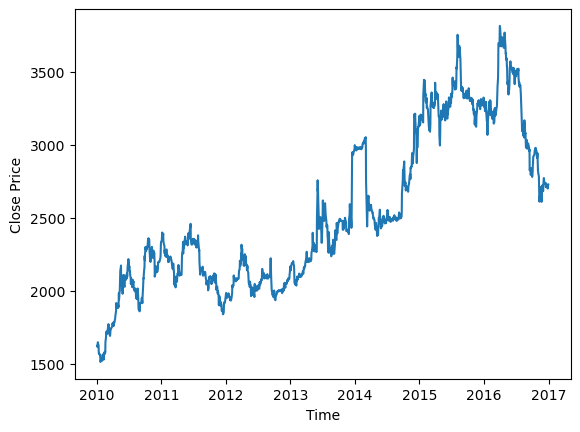

In [35]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(glaxo_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

###### BEML plot

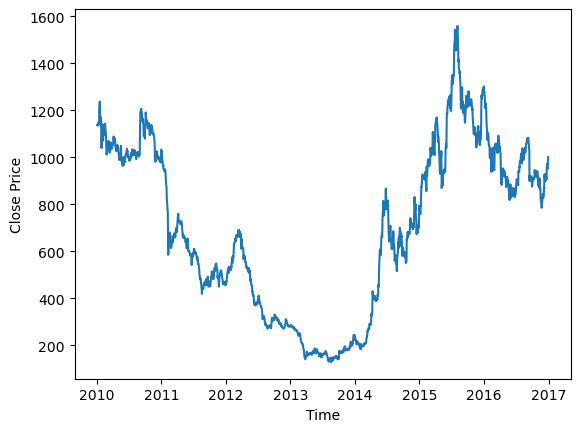

In [36]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

In [37]:
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods=1)
beml_df['gain'] = beml_df.Close.pct_change(periods=1)

In [38]:
#dropping first row since null
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()
glaxo_df

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
2010-01-11,2010-01-11,1629.45,-0.006312
...,...,...,...
2016-12-26,2016-12-26,2723.50,-0.001283
2016-12-27,2016-12-27,2701.75,-0.007986
2016-12-28,2016-12-28,2702.15,0.000148


Text(0, 0.5, 'gain')

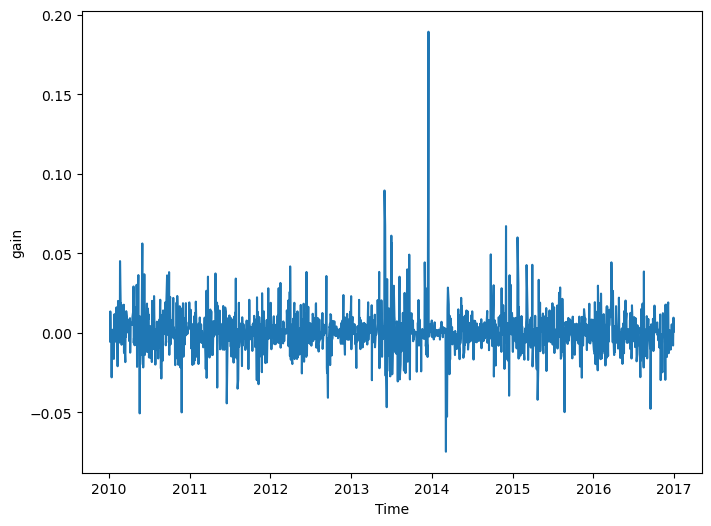

In [39]:
#plotting gain
plt.figure(figsize= (8,6));
plt.plot(glaxo_df.index,glaxo_df.gain);
plt.xlabel('Time');
plt.ylabel('gain')

Text(0, 0.5, 'gain')

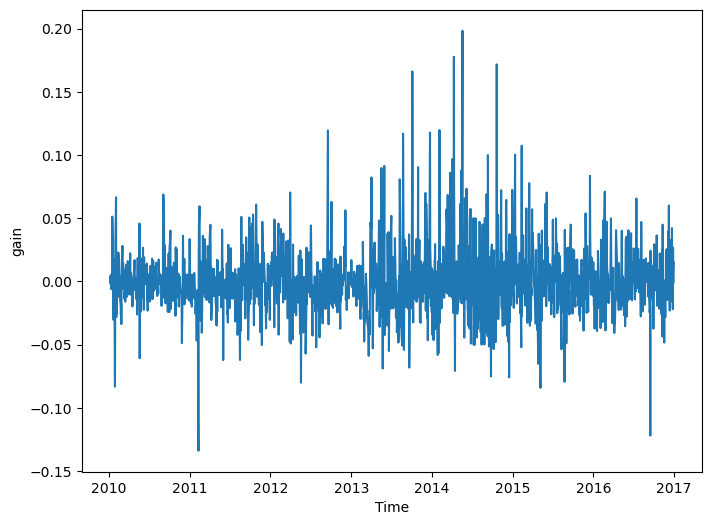

In [40]:
#plotting gain
plt.figure(figsize= (8,6));
plt.plot(beml_df.index,beml_df.gain);
plt.xlabel('Time');
plt.ylabel('gain')

C:\Users\HOME\AppData\Local\Temp\ipykernel_13924\1954850185.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(glaxo_df.gain, label='glaxo')


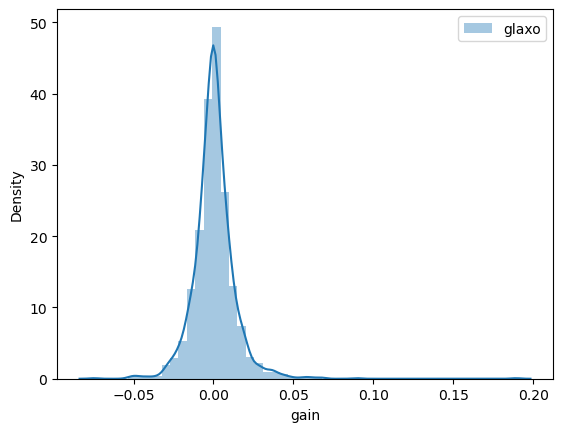

In [41]:
sn.distplot(glaxo_df.gain, label='glaxo')
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

C:\Users\HOME\AppData\Local\Temp\ipykernel_13924\2275164977.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(beml_df.gain, label='beml')


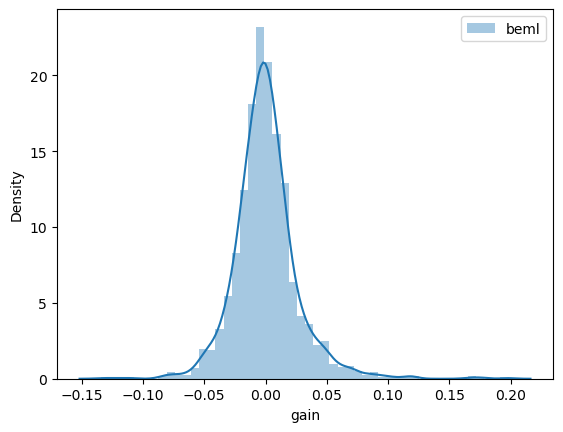

In [42]:
sn.distplot(beml_df.gain, label='beml')
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

##### mean and std for glaxo

In [43]:
print('Mean', round(glaxo_df.gain.mean(),4))
print('Standard Deviation: ', round(glaxo_df.gain.std(),4))

Mean 0.0004
Standard Deviation:  0.0134


##### mean and std for beml

In [44]:
print('Mean', round(beml_df.gain.mean(),4))
print('Standard Deviation: ', round(beml_df.gain.std(),4))

Mean 0.0003
Standard Deviation:  0.0264


In [45]:
from scipy import stats
#probablity of making 2% loss or higher in glaxo
stats.norm.cdf(-0.02,loc=glaxo_df.gain.mean(),scale=glaxo_df.gain.std())

0.06352488667177397

In [46]:
#probablity of making 2% gain or higher in glaxo

1-stats.norm.cdf(0.02,loc=glaxo_df.gain.mean(),scale=glaxo_df.gain.std())

0.07104511457618568

In [47]:
#probablity of making 2% loss or higher in beml
stats.norm.cdf(-0.02,loc=beml_df.gain.mean(),scale=beml_df.gain.std())

0.22155987503755287

In [48]:
#probablity of making 2% gain or higher in beml

1-stats.norm.cdf(0.02,loc=beml_df.gain.mean(),scale=beml_df.gain.std())

0.22769829484075355

### Confidence Interval

Confidence Interval for Glaxo's gains:
Lower Bound: -0.00024208549447730015
Upper Bound: 0.0010141676596618833


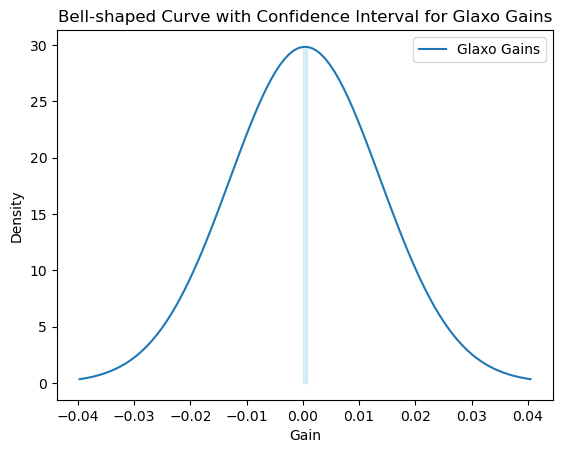

In [49]:
# mean and standard deviation of Glaxo's gains
mean_glaxo = glaxo_df.gain.mean()
std_glaxo = glaxo_df.gain.std()

# standard error
n_glaxo = len(glaxo_df)
std_error_glaxo = std_glaxo / np.sqrt(n_glaxo)

# Set confidence level
confidence_level = 0.95

z_score = stats.norm.ppf((1 + confidence_level) / 2)


margin_of_error_glaxo = z_score * std_error_glaxo

# confidence interval
lower_bound_glaxo = mean_glaxo - margin_of_error_glaxo
upper_bound_glaxo = mean_glaxo + margin_of_error_glaxo

print("Confidence Interval for Glaxo's gains:")
print(f"Lower Bound: {lower_bound_glaxo}")
print(f"Upper Bound: {upper_bound_glaxo}")

# Plot
x = np.linspace(mean_glaxo - 3 * std_glaxo, mean_glaxo + 3 * std_glaxo, 100)
y = stats.norm.pdf(x, mean_glaxo, std_glaxo)
plt.plot(x, y, label='Glaxo Gains')
plt.fill_between(x, 0, y, where=(x >= lower_bound_glaxo) & (x <= upper_bound_glaxo), color='skyblue', alpha=0.3)
plt.xlabel('Gain')
plt.ylabel('Density')
plt.title('Bell-shaped Curve with Confidence Interval for Glaxo Gains')
plt.legend()
plt.show()
